In [1]:
# Importamos liberías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
file = '/home/santanay/Projects/OHW_2023/Vientos_Satelitales_Peru_Vel.csv' # Cargamos nuestro archivo vientos
df = pd.read_csv(file,index_col=0,parse_dates=['Fecha'],
                 infer_datetime_format=True, sep=";")                      # Leemos el archivo

In [3]:
df_2020 = df[df.index.year==2020] # Seleccionamos un año (2020)

In [4]:
# Calculamos los intercuantiles y la mediana promediando cada 5 días
df_75 = df_2020.resample('5D').quantile(.75)
df_50 =df_2020.resample('5D').quantile(.5)
df_25 =df_2020.resample('5D').quantile(.25)

In [5]:
# Creamos vector tiempo
time=df_2020.resample('5D').mean().index

In [6]:
## Dibujamos nuestros cuartiles y la serie temporal para observar 
## cuándo pasamos dichos cuartiles

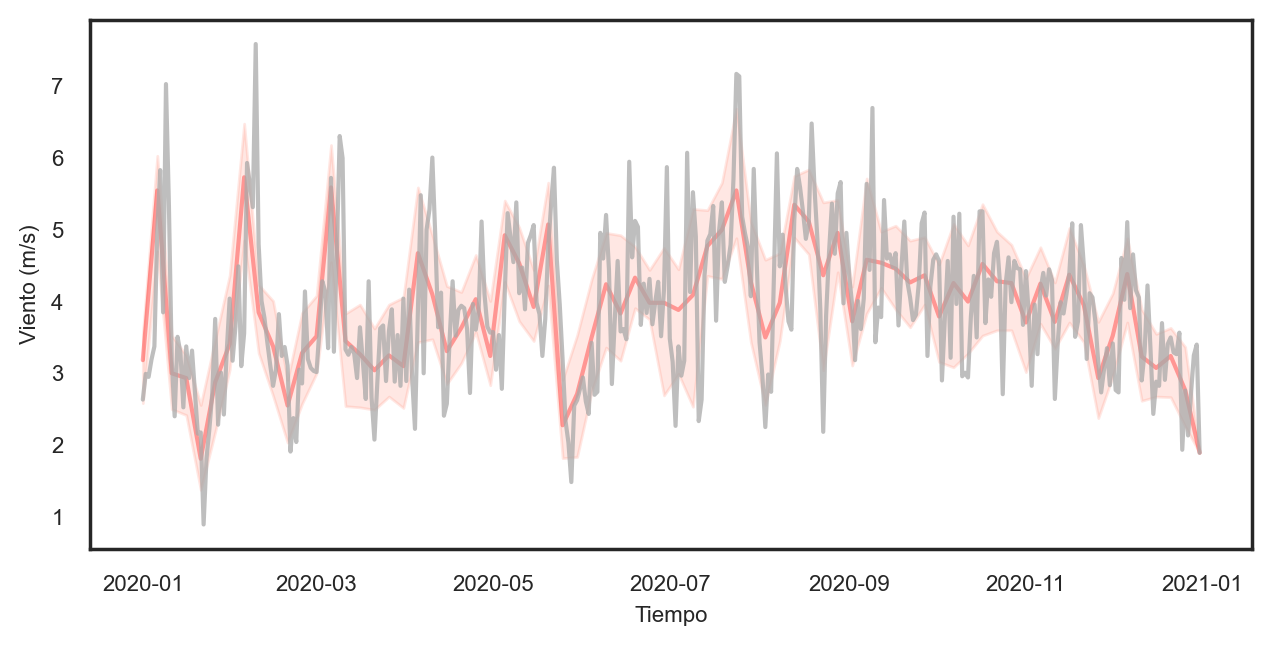

In [7]:
sns.set_context("notebook", font_scale=1.02, rc={"lines.linewidth": 1.2})
sns.set_theme(style="white")
sns.set_palette(sns.color_palette())
f, ax = plt.subplots(figsize=(7.5, 3.5),
                     dpi=200)
sns.lineplot(data=df_50.mean(1),
             legend=False,color='red',alpha=.35)
plt.fill_between(time,
                df_75.mean(1),
                df_25.mean(1),
                facecolor='tomato',edgecolor='tomato',alpha=.15,)
sns.lineplot(data=df_2020.mean(1),
             legend=False,color='darkgrey',alpha=.75)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
plt.ylabel('Viento (m/s)',fontsize=8)
plt.xlabel('Tiempo',fontsize=8)
plt.show()